# Case Study 1: From Exploration to Design

- Name: Frederick Song
- Student ID: 76798644
- Link to GitHub Repository: [DSCI 200 Case Study 1](https://github.com/fredsongubc/dsci_200_case_study_1)

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

---

In [1]:
devtools::install_github("lbelzile/hecedsm")

library(tidyverse)
library(hecedsm)

Skipping install of 'hecedsm' from a github remote, the SHA1 (df0a5444) has not changed since last install.
  Use `force = TRUE` to force installation

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hecedsm’


The following object is masked from ‘package:stringr’:

    words




---

## Milestone 1: Exploratory Data Analysis (EDA)

### Task 1: Choose your favourite dataset

#### 1.

In [2]:
data(BRLS21_EDA)
head(BRLS21_EDA)

id reltime task     occurence eda      hr      
1 1  0       baseline 1         20.60959 88.49560
2 1  1       baseline 1         21.41062 88.31564
3 1  2       baseline 1         22.26244 78.13892
4 1  3       baseline 1         24.22100 65.82009
5 1  4       baseline 1         24.23851 65.13290
6 1  5       baseline 1         23.63703 66.83456

---

#### 2. 

#### The primary research questions or objectives the authors aimed to address
- Compare the impact of different methods of sending and receiving messages while driving (Phone, Watch, Speaker, Texting) to assess the level of driving danger.
  
#### The importance or relevance of these goals in the context of the field
- While laws prohibit the use of mobile phones while driving, laws do not prohibit the use of smartwatches while driving. However, as they can also be a distraction, they may be a safety risk in driving, which requires sustained attention.
- With smartwatches becoming increasingly common, it is necessary to investigate their impact on driving. Given the limited existing research on this topic, more in-depth studies with larger sample sizes are necessary.

#### Specific hypotheses or outcomes the study sought to explore
##### **H1 Gaze distribution**
- **H1a.** Gaze distribution is less focused on the driving task while receiving written notifications on a smartwatch than while receiving them on a smartphone.
- **H1b.** Gaze distribution is less focused on the driving task while receiving written notifications on a smartphone than when hearing them through a speaker.
- **H1c.** Gaze distribution is less focused on the driving task when drivers have to respond to written notifications by text instead of responding to them vocally.
##### **H2 Driving behavior**
- **H2a.** Receiving written notifications on a smartwatch has more negative consequences on driving behaviour than receiving them on a smartphone.
- **H2b.** Receiving written notifications on a smartphone has more negative consequences on driving behaviour than hearing them from a speaker.
- **H2c.** Responding to written notifications by text has more negative consequences on driving behaviour than responding to them vocally.
##### **H3 Mental workload**
- **H3a.** Mental workload is higher while receiving written notifications on a smartwatch than on a smartphone inside a driving simulator.
- **H3b.** Mental workload is higher while receiving written notifications on a smartphone than when receiving them vocally inside a driving simulator.
- **H3c.** Mental workload is higher while responding to notifications by text than by responding orally to notifications inside a driving simulator.

---

### Task 2: Explore data

In [3]:
glimpse(BRLS21_EDA)

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


---

#### 3.

The dataset contains **10,942 observations** and **6 variables**.

---

#### 4.

The types of variables in the dataset are:
- **categorical**: `id` and `task`.
- **numerical**: `reltime`, `occurence`, `eda` and `hr`.

---

#### 5.

There is no need to convert any variable in the dataset before starting the analysis. 
\
The current variable type is appropriate and can be used directly for data visualization.

---

#### 6.

In [4]:
BRLS21_EDA |>
  summarise(
    id_missing        = sum(is.na(id)),
    reltime_missing   = sum(is.na(reltime)),
    task_missing      = sum(is.na(task)),
    occurence_missing = sum(is.na(occurence)),
    eda_missing       = sum(is.na(eda)),
    hr_missing        = sum(is.na(hr))
  )

id_missing reltime_missing task_missing occurence_missing eda_missing
1 0          0               0            0                 214        
  hr_missing
1 538

In [5]:
BRLS21_EDA |>
  summarise(
    id_missing_prop        = sum(is.na(id))        / nrow(BRLS21_EDA),
    reltime_missing_prop   = sum(is.na(reltime))   / nrow(BRLS21_EDA),
    task_missing_prop      = sum(is.na(task))      / nrow(BRLS21_EDA),
    occurence_missing_prop = sum(is.na(occurence)) / nrow(BRLS21_EDA),
    eda_missing_prop       = sum(is.na(eda))       / nrow(BRLS21_EDA),
    hr_missing_prop        = sum(is.na(hr))        / nrow(BRLS21_EDA)
  )

id_missing_prop reltime_missing_prop task_missing_prop occurence_missing_prop
1 0               0                    0                 0                     
  eda_missing_prop hr_missing_prop
1 0.01955767       0.04916834

- The variables `id`, `reltime`, `task`, and `occurence` have **0** missing values.

- The variable `eda` has **214** missing values. Its proportion of missing data is **0.01955767**.
- The variable `hr` has **538** missing values. Its proportion of missing data is **0.04916834**.

- There are no variables with a large proportion of missing data.

---

#### 7.

In [6]:
BRLS21_EDA |> count(task) |> mutate(prop = n / sum(n)) |> arrange(-prop) |> head(4)
BRLS21_EDA |> count(id)   |> mutate(prop = n / sum(n)) |> arrange(-prop) |> head(4)

task      n    prop     
1 watch     3786 0.3460062
2 cell      3028 0.2767319
3 baseline  2736 0.2500457
4 voicecall 1392 0.1272162

id n   prop      
1 16 455 0.04158289
2 4  431 0.03938951
3 27 417 0.03811003
4 23 406 0.03710473

- There is **no** evidence of class imbalance in any categorical variable in the dataset.

- For the `task` variable, the largest category `watch` accounts for about **34.6%**, not a large majority of the observations.
- For the `id` variable, the largest category `16` accounts for about only **4.2%**.


---

### Task 3: Data visualization

#### 8.

- The two numerical variables selected from the dataset are: `eda` and `hr`.
- A scatter plot is appropriate to explore the relationship between these two variables.

Warning message:
“Removed 739 rows containing missing values or values outside the scale range
(`geom_point()`).”


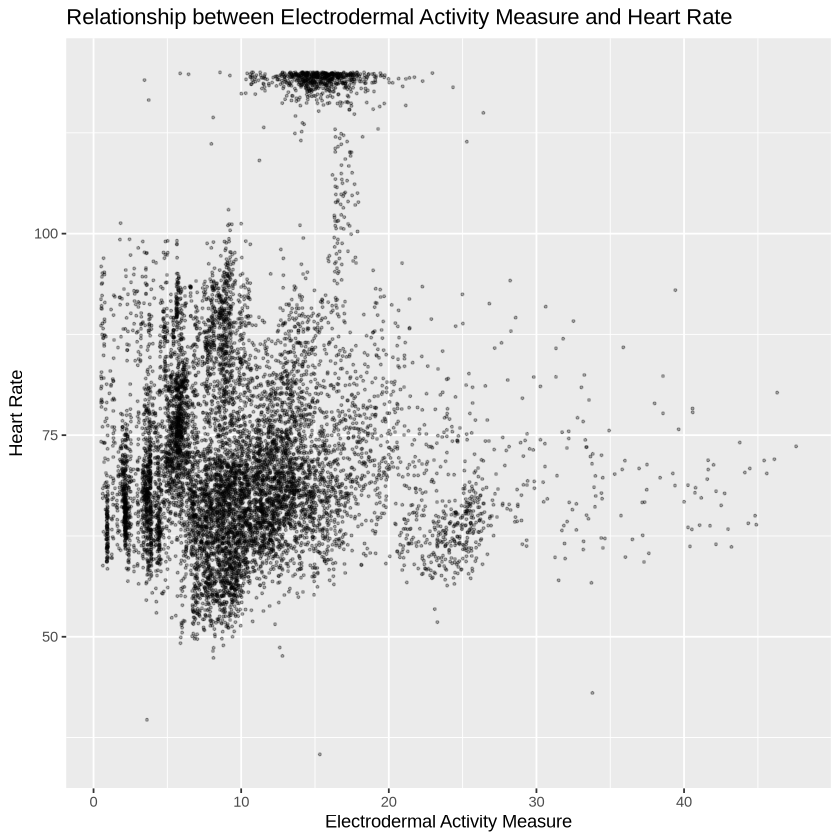

In [7]:
BRLS21_EDA |>
  ggplot(aes(x = eda, y = hr)) +
  geom_point(alpha = 0.3, size = 0.5) +
  ggtitle("Relationship between Electrodermal Activity Measure and Heart Rate") +
  xlab("Electrodermal Activity Measure") +
  ylab("Heart Rate")

- The scatter plot reveals that data points are widely spread, indicating **no clearly linear relationship** overall.

- Most observations cluster within the lower EDA range.

- As EDA values increase, data points gradually become more thinly spread.

- The HR variation range for the same EDA is relatively large.

---

#### 9.

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“Removed 214 rows containing non-finite outside the scale range (`stat_bin()`).”


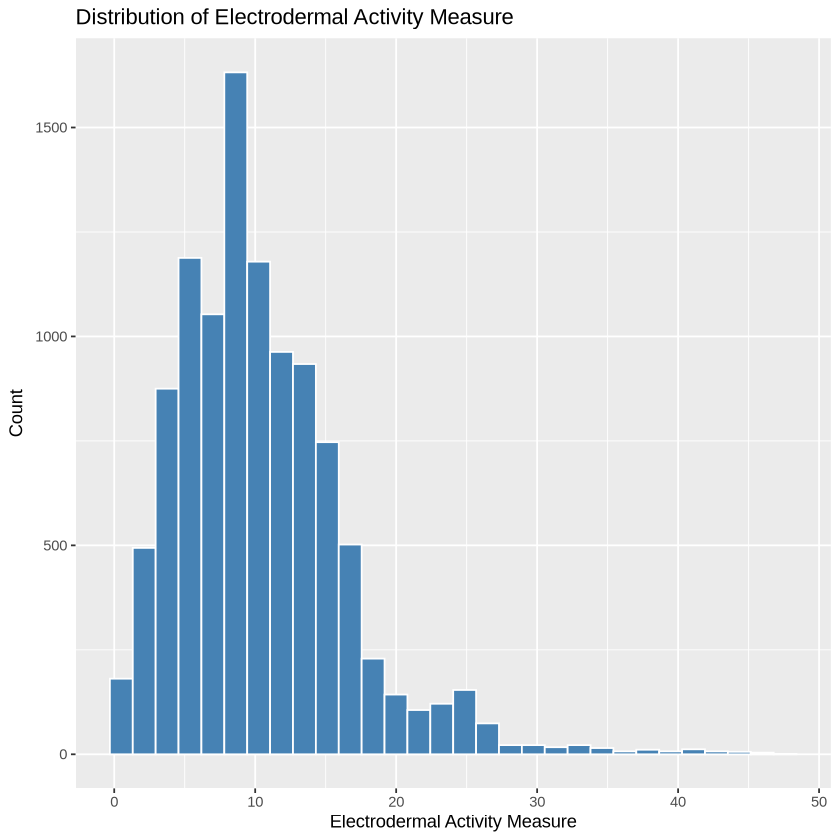

In [8]:
BRLS21_EDA |>
  ggplot(aes(x = eda)) +
  geom_histogram(fill = "steelblue", color = "white") +
  ggtitle("Distribution of Electrodermal Activity Measure") +
  xlab("Electrodermal Activity Measure") +
  ylab("Count")

- The histogram reveals that the EDA distribution exhibits a **right skew**.

- Most observations cluster within the low to medium EDA range, while only a small number of observations exist in the higher value region, forming a long right tail.

- Based on this distribution, a typical EDA observation generally falls within the range of approximately **5 to 15**.

---

#### 10.

Warning message:
“Removed 214 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


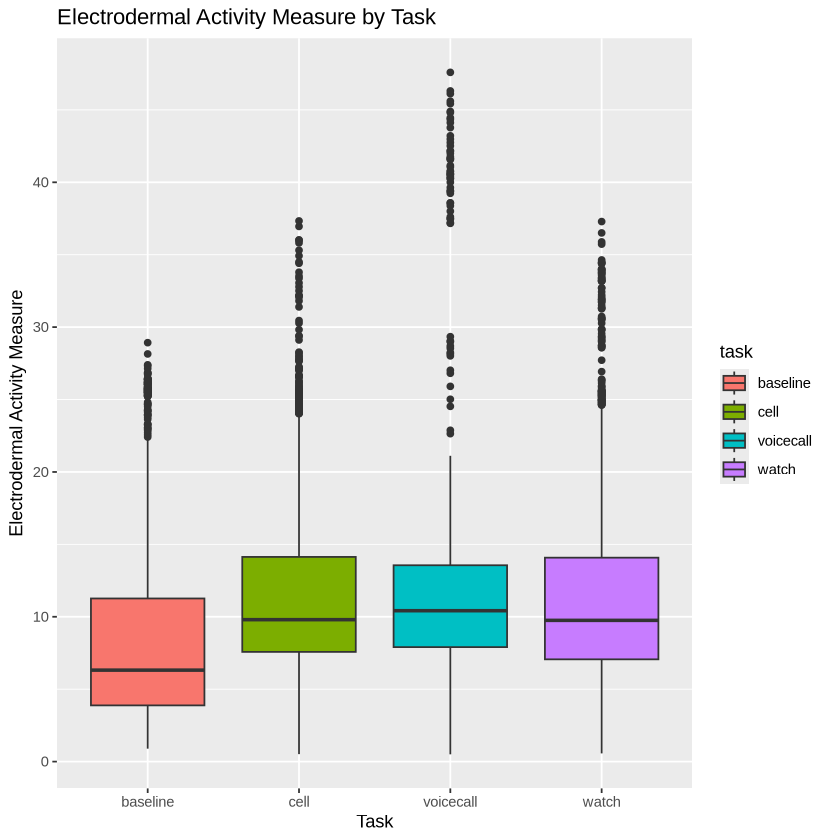

In [9]:
BRLS21_EDA |>
  ggplot(aes(x = task, y = eda, fill = task)) +
  geom_boxplot() +
  ggtitle("Electrodermal Activity Measure by Task") +
  xlab("Task") +
  ylab("Electrodermal Activity Measure")

- The box plots reveal **noticeable differences** in EDA distribution across different tasks.

- Under the baseline condition, the overall EDA level is the lowest, with both the median and range of distribution being smaller.

- The median EDA values under the cell, voicecall, and watch conditions are all higher, and the distribution ranges are broader.

- Specifically, higher EDA values appear more frequently under the voicecall condition.

- Overall, this chart indicates an association between task type and the level of EDA.

---

### Task 4: Find summary statistics

#### 12.

In [10]:
BRLS21_EDA |> summarise(median_eda = median(eda, na.rm = TRUE))

median_eda
1 9.366185

- The distribution of EDA has a right skew and contains a significant number of large numbers.

- Compared to the mean, the median is less impacted by the influence of extreme values and better represents the typical level of EDA.

- Therefore, the **median** is an appropriate measure for describing the central tendency of this numerical variable.

- The median of EDA is approximately **9.37**.

---

In [11]:
BRLS21_EDA |> count(task) |> mutate(proportion = n / sum(n))

task      n    proportion
1 baseline  2736 0.2500457 
2 cell      3028 0.2767319 
3 voicecall 1392 0.1272162 
4 watch     3786 0.3460062

---

#### 14.

In [12]:
BRLS21_EDA |> select(eda, hr) |> corrr::correlate()

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term eda       hr       
1 eda         NA 0.1435454
2 hr   0.1435454        NA

- The **Pearson correlation coefficient** between EDA and HR is approximately **0.14**, indicating a **weak positive correlation** between the two.

- As the level of EDA increases, there is a slight overall upward trend in HR, but this association is relatively weak. 

- There is **no clear linear relationship** between the EDA and HR.

---

### Task 5: Develop a question

#### 15.

Compared to phone notifications (`cell`), do smartwatch notifications (`watch`) results in higher levels of EDA while driving?

---

#### 16.

- There is **no need** to split the data into training and testing sets.

- The objective of this research question is to compare the level of `EDA` across two kinds of `task`, not to train a new predictive model.

- This is a **descriptive** question, not a predictive question.

---

#### 17.

In [13]:
answer_17 <- BRLS21_EDA |>
  filter(task == "watch" | task == "cell") |>
  group_by(id, task) |>
  summarise(mean_eda = mean(eda, na.rm = TRUE))

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


- The new feature derived from the existing variables is **the average `EDA` for each participant (`ID`) under the watch and cell `task` conditions**.

- First, **filter** observations where the `task` type is either watch or cell.

- Then, **group by** `ID` and `task`, and **calculate** the mean `EDA` within each group.

- Comparing the mean `EDA` of the same participant under watch and cell conditions helps more clearly evaluate the relative impact of the two notification tasks on `EDA`, making this a valuable feature.

---

## Milestone 2: Sampling and Study Design

### Task 6: Describe design

#### 18.

- The type of data analysis questions the authors of the paper hoping to answer is **inferential**.

- The study **proposes several clear hypotheses** and **uses hypothesis testing**, **reporting p-values** to assess the correctness of hypotheses.

---

#### 19.

- The **Population** used in this study: **All drivers** who receive and process notifications while driving.
  
- The **Sample** used in this study: **31 voluntary registered drivers** between the ages of 18 and 47 who drive in a driving simulator while receiving and answering text messages.

---

#### 20.

- This is a **controlled experiment study**.

- In the Section 3.1. Experimental Design of the paper, the researchers clearly states: "A **within-subject experiment** was conducted with the notification medium as the main independent variable."

- This indicates that the researchers actively controlled the independent variable and compared results under controlled conditions.

---

### Task 7: Dive into the design

#### 21.

- Researchers **controlled for many confounding variables** in this study.

- The same participant completed across all four kinds of tasks to **reduce participant-related bias**.

- The order of the four tasks was randomized to **reduce order-related bias**.

- Notification content was randomly assigned across the four tasks, with each task receiving 6 notifications to **reduce notification-related bias**.

---

#### 23.

- There were **several potential sources of sampling bias** that may have affected the study’s conclusions.
  
- The **age structure** of the sample is skewed toward younger individuals as the author stated that "Twenty-four (24) out of 31 participants were aged between 20 and 26 years old."

- The **smartwatch usage experience** of the sample is relatively scarce in the sample as the author stated that "Only 9 out of the 31 participants were smartwatch users, with only one of them who used it for over two years, according to the questionnaire’s results."

- Participants were **recruited voluntarily** through the research panel of the researchers' institution. This may lead to the sample of drivers differing from the population of drivers.

---

### Task 8: Now it is your turn

#### 24.

- If I were to design this study myself, I would use a different sampling and design method. These improvements **primarily address the shortcomings acknowledged by the author**.

- **Sampling**:

  - Expand the **age range** of the sample.

  - Increase the **proportion of smartwatch users**.

  - Using smart devices of **various brands and models**.

  - **Such changes make the sample more representative of the population.**

- **Design**:

  - The author notes that due to the battery limitations of the eye-tracking glasses, there was no control condition. Perhaps **a control condition could be added** by using more advanced eye-tracking glasses or by shortening the test duration for each condition.

  - The author suggests that "More driving measures could be added in a future study for a better overall view of driving behaviour." **Additional driving indicators should be incorporated** as recommended by the author.

  - The author suggests that "screening for issues related to eyesight and vision should be a part of subsequent research." **An eyesight check should be incorporated** as recommended by the author.

- The authors might have chosen not to use alternative sampling or design methods due to:

  - There exist **critical technical constraints**, such as the battery temperature of tracking glasses.
    
  - The authors may have **prioritized experimental efficiency over attempts to enhance sample representativeness**. So they use participants who enrolled voluntarily.

- The **potential limitations** or challenges of my proposed approach are:

  - **Technical constraints** may not be resolved in the short term.
 
  - Recruiting more representative samples would be **more difficult and costly**.
 
  - Using multiple brands and models of smart devices may **introduce new biases**.

---